In [1]:
import pandas as pd
import os
import matplotlib
%matplotlib inline
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import numpy as np
import seaborn as sb
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import sklearn.metrics
from sklearn.neighbors import KNeighborsClassifier
import pickle


import warnings
warnings.filterwarnings("ignore")


/usr/local/anaconda/lib/python3.6/site-packages/matplotlib/font_manager.py:278: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [34]:
file_name = 'XGBoostMLModel.sav'

In [36]:
model = pickle.load(open(file_name,'rb'))

In [37]:
model.best_params_

{'n_estimators': 200, 'scale_pos_weight': 20}

In [38]:
model.get_params().keys()

dict_keys(['cv', 'error_score', 'estimator__base_score', 'estimator__booster', 'estimator__colsample_bylevel', 'estimator__colsample_bytree', 'estimator__gamma', 'estimator__learning_rate', 'estimator__max_delta_step', 'estimator__max_depth', 'estimator__min_child_weight', 'estimator__missing', 'estimator__n_estimators', 'estimator__n_jobs', 'estimator__nthread', 'estimator__objective', 'estimator__random_state', 'estimator__reg_alpha', 'estimator__reg_lambda', 'estimator__scale_pos_weight', 'estimator__seed', 'estimator__silent', 'estimator__subsample', 'estimator', 'fit_params', 'iid', 'n_jobs', 'param_grid', 'pre_dispatch', 'refit', 'return_train_score', 'scoring', 'verbose'])

In [39]:
feature_importances = model.best_estimator_.feature_importances_

In [40]:
predicted_output_test = model.predict(input_test)
print(classification_report(output_test['becameLicensed'],predicted_output_test))

             precision    recall  f1-score   support

          0       0.98      0.87      0.92     91382
          1       0.18      0.61      0.28      4464

avg / total       0.94      0.86      0.89     95846



In [41]:
predicted_output_train = model.predict(input_train)
print(classification_report(output_train['becameLicensed'],predicted_output_train))

             precision    recall  f1-score   support

          0       0.98      0.87      0.92    365529
          1       0.18      0.61      0.28     17854

avg / total       0.94      0.85      0.89    383383



In [43]:
feature_names = input_train.columns

In [44]:
feat_imp, feat_nam = zip(*sorted(zip(feature_importances.round(3),feature_names), reverse=True))

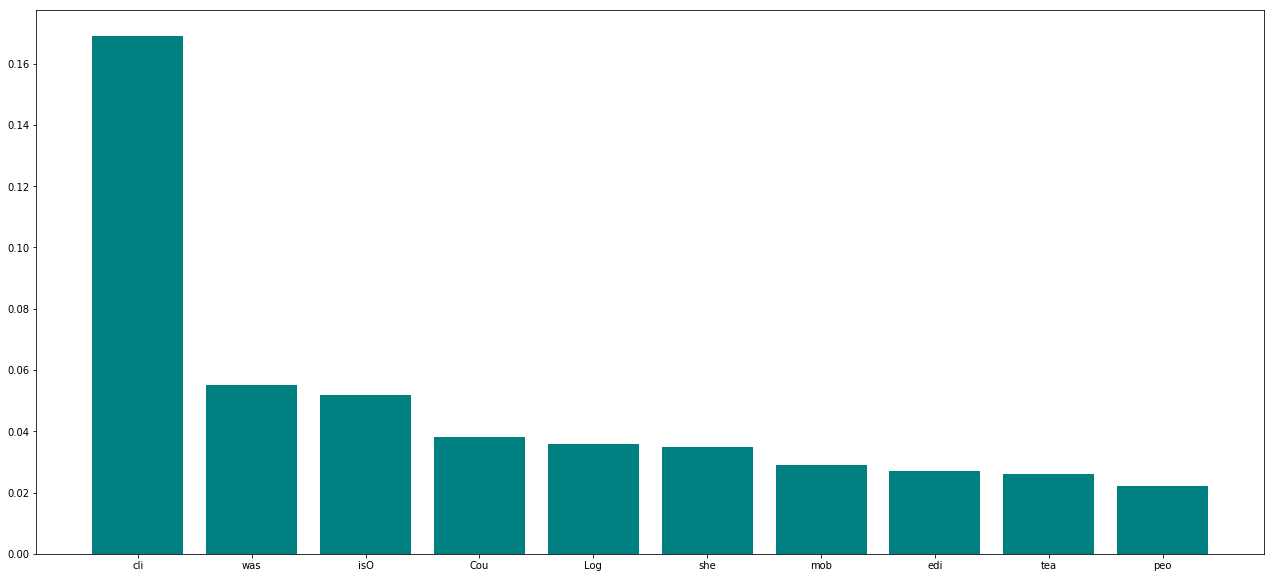

In [49]:
matplotlib.pyplot.figure(figsize=(22,10))
matplotlib.pyplot.bar([feature[:3] for feature in feat_nam[:10]],feat_imp[:10],color='teal')
matplotlib.pyplot.show()

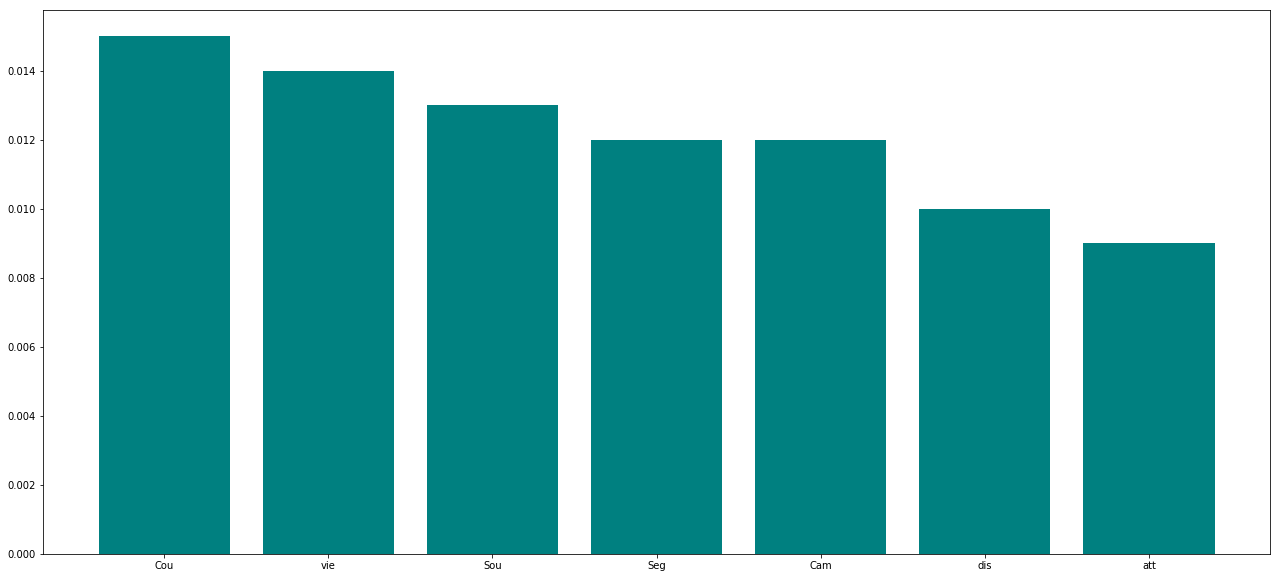

In [50]:
matplotlib.pyplot.figure(figsize=(22,10))
matplotlib.pyplot.bar([feature[:3] for feature in feat_nam[10:20]],feat_imp[10:20],color='teal')
matplotlib.pyplot.show()